# Problem 2.7

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Part a.

Let's first find the normalization constant.

$$
\begin{eqnarray}
 \int | \psi |^2 \, dx & = & 1 \\
\Longrightarrow \int_0^{\frac{a}{2}} A^2 x^2 \, dx + \int_{\frac{a}{2}}^a A^2 (a - x)^2 \, dx & = & 1 \\
\Longrightarrow A^2 \left[ \frac{x^3}{3} \bigg\rvert_0^{\frac{a}{2}} + a^2 x - ax^2 + \frac{x^3}{3} \bigg\rvert_{\frac{a}{2}}^a \right] \\
\Longrightarrow A^2 \left[ \frac{a^3}{24} + \frac{a^3}{2} - a^3 + \frac{a^3}{4} + \frac{a^3}{3} - \frac{a^3}{24} \right] & = & 1 \\
\Longrightarrow \frac{A^2 a^3}{12} & = & 1 \\
\Longrightarrow A & = & 2 \sqrt{\frac{3}{a^3}}
\end{eqnarray}
$$

Now we'll plot the wavefunction taking $a = 1$.

In [4]:
a = 1
A = 2 * np.sqrt(3 / a**3)
X = np.linspace(0, a, num=1000)
psi = np.zeros_like(X)
psi[X < a / 2] = A * X[X < a / 2]
psi[X >= a / 2] = A * (a - X[X >= a / 2])

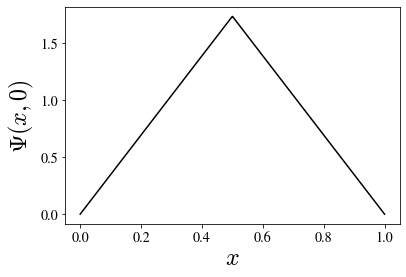

In [5]:
plt.plot(X, psi, c='k')
plt.xlabel(r'$x$')
plt.ylabel(r'$\Psi(x, 0)$');

## Part b.

We have from eq. 2.36 that

$$
\Psi(x, t) = \sum_{n = 1}^{\infty} c_n \sqrt{\frac{2}{a}} \sin \left( \frac{n\pi}{a} x \right) e^{-i\frac{n^2\pi^2\hbar}{2ma^2}t},
$$

where from eq. 2.37 we have

$$
c_n = \sqrt{\frac{2}{a}} \int_0^a \sin \left( \frac{n \pi}{a} x \right) \Psi(x, 0) \, dx.
$$

Substituting in $\Psi(x, 0)$ yields

$$
\begin{eqnarray}
c_n & = & \frac{2 \sqrt{6}}{a^2} \left[ \int_0^{\frac{a}{2}} \sin \left( \frac{n \pi}{a} x \right) x \, dx + \int_{\frac{a}{2}}^a \sin \left( \frac{n\pi}{a} x \right) (a - x) \, dx \right] \\
& = & \frac{2\sqrt{6}}{a^2} \left[ \left(\frac{a}{n\pi} \right)^2 \left( \sin \left( \frac{n\pi}{a} x \right) - \frac{n\pi}{a} x \cos \left( \frac{n\pi}{a} x \right) \right) \right]_0^{\frac{a}{2}}
 - \left[\frac{a^2}{n\pi} \cos \left( \frac{n\pi}{a} x \right)
 - \left(\frac{a}{n\pi}\right)^2 \left( \sin \left( \frac{n\pi}{a} x \right) - \frac{n\pi}{a} x \cos \left(\frac{n\pi}{a} x \right)\right) \right]_{\frac{a}{2}}^a \\
& = & \frac{2\sqrt{6}}{a^2} \left[\left(\frac{a}{n\pi}\right)^2 \left( \sin \left( \frac{n\pi}{2} \right) - \frac{n\pi}{2} \cos \left(\frac{n\pi}{2} \right)\right) - \frac{a^2}{n\pi} \left( \cos(n\pi) - \cos \left( \frac{n\pi}{2} \right) \right) - \left(\frac{a}{n\pi}\right)^2 \left( \sin(n\pi) - \sin \left(\frac{n\pi}{2} \right) - n\pi \cos(n\pi) + \frac{1}{2} n\pi \cos \left( \frac{1}{2} n\pi \right) \right) \right] \\
\end{eqnarray}
$$


Here we must separate out the cases of even and odd $n$:

$$
c_n = \begin{cases}
 \frac{2\sqrt{6}}{a^2} \left[\left(\frac{a}{n\pi}\right)^2 \left(-\frac{n\pi}{2}\right)(-1)^{\frac{n}{2}} - \frac{a^2}{n\pi} \left(1 - (-1)^{\frac{n}{2}}\right) - \left(\frac{a}{n\pi}\right)^2 \left(-n\pi + \frac{n\pi}{2} (-1)^{\frac{n}{2}}\right)\right], & n \; \textrm{even} \\
 \frac{2\sqrt{6}}{a^2} \left[ \left(\frac{a}{n\pi}\right)^2\left(-1\right)^{\frac{1}{2}(n-1)} - \frac{a^2}{n\pi}(-1)-\left(\frac{a}{n\pi}\right)^2\left(-(-1)^{\frac{1}{2}(n-1)} + n\pi\right)\right] & n \; \textrm{odd} \\
\end{cases}
$$

Simplifying,

$$
c_n = \begin{cases}
\frac{2\sqrt{6}}{n\pi} \left[-(-1)^{n/2} + 1 - 1 + (-1)^{n/2} \right], & n \; \textrm{even} \\
\frac{2\sqrt{6}}{n\pi} \left[ \frac{(-1)^{\frac{1}{2}(n - 1)}}{n\pi} + 1 + \frac{(-1)^{\frac{1}{2}(n-1)}}{n\pi} - 1 \right], & n \; \textrm{odd}
\end{cases}
$$

This finally becomes

$$
c_n = \begin{cases}
0, & n \; \textrm{even} \\
(-1)^{\frac{1}{2}(n - 1)} \frac{2\sqrt{6}}{(n\pi)^2}, & n \; \textrm{odd}
\end{cases}
$$

Putting this all together, we have

$$
\Psi(x, t) = \sum_{n = 1 \\ n \; \textrm{odd}}^{\infty} (-1)^{\frac{1}{2}(n-1)} \frac{4}{(n\pi)^2} \sqrt{\frac{3}{a}} \sin \left( \frac{n\pi}{a} x \right) e^{-i \frac{n^2 \pi^2 \hbar}{2ma^2}t}
$$

## Part c.

The probability that a measurement of the particle's energy will yield $E_1$ is

$$
\begin{eqnarray}
P(E = E_1) & = & |c_1|^2 \\
& = & \left(\frac{2\sqrt{6}}{\pi^2}\right)^2 \\
& = & \frac{24}{\pi^4}
\end{eqnarray}
$$

In [6]:
24 / np.pi**4

0.2463835741124241

## Part d.

The expectation value of the energy is

$$
\begin{eqnarray}
\langle H \rangle & = & \sum_{n=1\\n \; \textrm{odd}}^{\infty} \frac{24}{(n\pi)^4} (-1)^{n-1} \frac{n^2 \pi^2 \hbar^2}{2ma^2} \\
& = & \sum_{n=1\\n \; \textrm{odd}}^{\infty} (-1)^{n-1} \frac{12 \hbar^2}{n^2\pi^2 ma^2} \\
& = & \frac{12 \hbar^2}{ma^2 \pi^2} \sum_{n=1\\n \; \textrm{odd}}^{\infty} \frac{(-1)^{n-1}}{n^2} \\
& = & \frac{12\hbar^2}{ma^2\pi^2} \left(\frac{\pi^2}{8}\right) \\
& = & \frac{3}{2} \frac{\hbar^2}{ma^2}
\end{eqnarray}
$$